In [1]:
import numpy as np
from PIL import Image
import ctypes
import matplotlib.pyplot as plt
import random
import os

In [2]:
directory_inputs = ["../database/32x32/grey/asie_sud_est","../database/32x32/grey/rome_grece","../database/32x32/grey/chateau_europe"]
directory_test_inputs = ["../database/32x32/grey/tests/asie_sud_est","../database/32x32/grey/tests/rome_grece","../database/32x32/grey/tests/chateau_europe"]
# directory_inputs = ["../database/resized_dataset/amerique_sud","../database/resized_dataset/asie_sud_est","../database/resized_dataset/rome_grece"]

In [3]:
X = []
Y = []

for i in range(len(directory_inputs)):
    for image_file in os.listdir(directory_inputs[i]):
        if 'image' in image_file:
            if i == 0 :
                image_file = Image.open(directory_inputs[i]+'/'+image_file)
                # print(image_file)
                X.append(np.asarray(image_file))
                Y.append([1., -1., -1.])
            elif i == 1 :
                image_file = Image.open(directory_inputs[i]+'/'+image_file)
                # print(image_file)
                X.append(np.asarray(image_file))
                Y.append([-1., 1., -1.])
            elif i == 2 :
                image_file = Image.open(directory_inputs[i]+'/'+image_file)
                # print(image_file)
                X.append(np.asarray(image_file))
                Y.append([-1.,-1.,1.])

X = np.array(X, dtype=ctypes.c_float)
X_flat = X.flatten()/255 * 2 - 1

Y = np.array(Y, dtype=ctypes.c_float)
Y_flat = Y.flatten()

In [4]:
# len(Y_flat)

In [5]:
X_train = []
Y_train = []

for i in range(len(directory_test_inputs)):
    for image_file in os.listdir(directory_test_inputs[i]):
        if 'image' in image_file:
            if i == 0 :
                image_file = Image.open(directory_test_inputs[i]+'/'+image_file)
                # print(image_file)
                X_train.append(np.asarray(image_file))
                Y_train.append([1., -1.,-1.])
            elif i == 1 :
                image_file = Image.open(directory_test_inputs[i]+'/'+image_file)
                # print(image_file)
                X_train.append(np.asarray(image_file))
                Y_train.append([-1., 1.,-1.])
            elif i == 2 :
                image_file = Image.open(directory_test_inputs[i]+'/'+image_file)
                # print(image_file)
                X_train.append(np.asarray(image_file))
                Y_train.append([-1., -1.,1.])

X_train = np.array(X_train, dtype=ctypes.c_float)
X_train_flat = X_train.flatten()/255 * 2 - 1

Y_train = np.array(Y_train, dtype=ctypes.c_float)
Y_train_flat = Y_train.flatten()

In [6]:
# len(X_train)

In [7]:
# print(len(X_flat)/(3*27*27))
# print(len(Y_train_flat)/2)

In [8]:
# print(len(X_flat)/len(X))
# print(len(Y_flat))
#
# print(X_flat)
# print(Y_flat)

In [9]:
# print(len(X_flat))

In [10]:
my_lib = ctypes.CDLL(r"..\rust_lib\target\release\rust_lib.dll")

my_lib.delete_float_array.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
]

my_lib.generate_random_mpl_w.argtypes = [ctypes.POINTER(ctypes.c_float), ctypes.c_int32]
my_lib.generate_random_mpl_w.restype = ctypes.POINTER(ctypes.c_float)

my_lib.delete_float_array.restype = None

layers = np.array([len(X_flat)/len(X), 256, 128, 64, 3], dtype=ctypes.c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
layers_pmc = (ctypes.c_float * len(layers))(*layers)
layers_ptr_pmc = ctypes.cast(layers_pmc, LP_c_float)

print(len(layers_pmc))
number_of_layers = len(layers_pmc)
print(layers)
number_of_classes_to_predict = int(layers[-1])

5
[1024.  256.  128.   64.    3.]


In [11]:
# print(int(layers[-1]))

In [12]:
# w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
# w_array = np.ctypeslib.as_array(w_array_ptr, ((7501*3 + 4*3,))) #3*16 + 17*16 + 17*3
#
# LP_c_float = ctypes.POINTER(ctypes.c_float)
# x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
# x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
# LP_c_float = ctypes.POINTER(ctypes.c_float)
# y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
# y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)
# my_lib.multi_layer_perceptron_training.argtypes = [
#     ctypes.POINTER(ctypes.c_float),
#     ctypes.POINTER(ctypes.c_float),
#     ctypes.POINTER(ctypes.c_float),
#     ctypes.c_int32,
#     ctypes.c_int32,
#     ctypes.c_int32,
#     ctypes.c_float,
#     ctypes.c_int32,
#     ctypes.POINTER(ctypes.c_float),
#     ctypes.c_int32,
#     ctypes.c_bool,
# ]
# my_lib.multi_layer_perceptron_training.restype = ctypes.POINTER(ctypes.c_float)

In [13]:
# print(len(X))

In [14]:
w_array_ptr = my_lib.generate_random_mpl_w(layers_ptr_pmc, number_of_layers)
w_array = np.ctypeslib.as_array(w_array_ptr, ((1025*256+257*128+129*64+65*3,))) #3*16 + 17*16 + 17*3

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict = (ctypes.c_float * len(X_flat))(*X_flat)
x_to_predict_ptr = ctypes.cast(x_to_predict, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict = (ctypes.c_float * len(Y_flat))(*Y_flat)
y_to_predict_ptr = ctypes.cast(y_to_predict, LP_c_float)

LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_test = (ctypes.c_float * len(X_train_flat))(*X_train_flat)
x_to_predict_test_ptr = ctypes.cast(x_to_predict_test, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict_test = (ctypes.c_float * len(Y_train_flat))(*Y_train_flat)
y_to_predict_test_ptr = ctypes.cast(y_to_predict_test, LP_c_float)

my_lib.multi_layer_perceptron_accuracy.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_float,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]
my_lib.multi_layer_perceptron_accuracy.restype = ctypes.POINTER(ctypes.c_float)

In [15]:
# int(len(X_flat)/len(X))

In [16]:
pmc_trained_model_accuracy_ptr = my_lib.multi_layer_perceptron_accuracy(
    w_array_ptr,
    y_to_predict_ptr,
    x_to_predict_ptr,
    len(X),  # number of inputs
    y_to_predict_test_ptr,
    x_to_predict_test_ptr,
    len(X_train),
    int(len(X_flat)/len(X)),  # dimension of inputs
    3,  # number of classes to predict
    0.001,  # learning rate
    1000,  # epochs
    1,
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,
)

pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_accuracy_ptr, (1025*256+257*128+129*64+65*3,))



In [17]:
np.savetxt('saved_pmc_grey_256_128_64_3', pmc_trained_model)

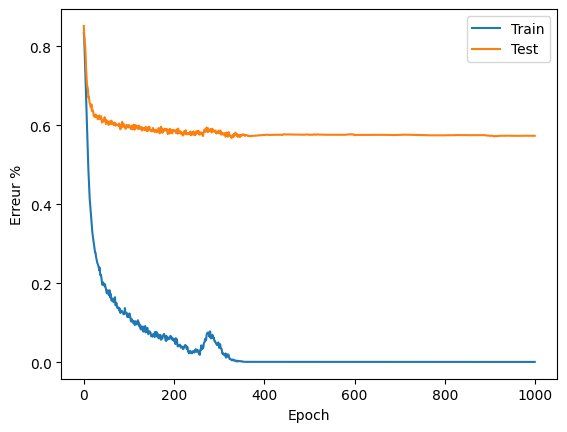

In [21]:
f = open("saved_accuracy.txt", "r")
content = f.readlines()
acc_train = [float(value) for value in content[0].strip().replace(',', ' ').split()]
acc_test = [float(value) for value in content[1].strip().replace(',', ' ').split()]

plt.plot(range(len(acc_train)), acc_train, label='Train')
plt.plot(range(len(acc_test)), acc_test, label='Test')

plt.xlabel('Epoch')
plt.ylabel('Erreur %')

plt.legend()

plt.show()

In [21]:
from json import dump
with open('saved_pmc_grey_128_128_3_json', 'w') as filepath :
  dump(pmc_trained_model.to_list())

AttributeError: 'numpy.ndarray' object has no attribute 'to_list'

In [ ]:
# pmc_trained_model_ptr = my_lib.multi_layer_perceptron_training(
#     w_array_ptr,
#     y_to_predict_ptr,
#     x_to_predict_ptr,
#     len(X),  # number of inputs
#     int(len(X_flat)/len(X)),  # dimension of inputs
#     number_of_classes_to_predict,  # number of classes to predict
#     0.005,  # learning rate
#     1000,  # epochs
#     layers_ptr_pmc,  # pointeur vers la forme de pmc
#     number_of_layers,  # number of layers
#     True,
# )
#
# pmc_trained_model = np.ctypeslib.as_array(pmc_trained_model_ptr, (7501*3+4*3,))
# #print(pmc_trained_model)


In [17]:
print(len(pmc_trained_model))

120849


In [37]:
image_a_predire_grec = np.asarray(Image.open('test_images/rome_grece/predict_grec.jpg').resize((32,32)).convert('L'))/255 * 2 - 1
image_a_predire_asie = np.asarray(Image.open('test_images/asie_sud_est/predict_asie.jpg').resize((32,32)).convert('L'))/255 * 2 - 1
image_a_predire_asie_maps = np.asarray(Image.open('test_images/asie/predict_asia_maps.png').resize((32,32)).convert('L'))/255 * 2 - 1
image_a_predire_chateau = np.asarray(Image.open('test_images/chateau/image_2023-06-26_16-37_0.jpg').resize((32,32)).convert('L'))/255 * 2 - 1



# image_a_predire_amerique = np.asarray(Image.open('test_images/predict_amerique.jpg').resize((27,27)).convert('RGB'))

# print(image_a_predire_grec)
# print(image_a_predire_asie)
# print(image_a_predire_amerique)

# image_a_predire_grec.show()
# image_a_predire_amerique.show()
# image_a_predire_asie.show()

image_a_predire_data = np.array([image_a_predire_asie,image_a_predire_grec,image_a_predire_asie_maps,image_a_predire_chateau],dtype=ctypes.c_float)
image_a_predire_data_flat=image_a_predire_data.flatten()



In [38]:
print(len(image_a_predire_data))
print(len(image_a_predire_data_flat))

4
4096


In [39]:
LP_c_float = ctypes.POINTER(ctypes.c_float)
x_to_predict_test = (ctypes.c_float * len(X_train_flat))(*X_train_flat)
x_to_predict_test_ptr = ctypes.cast(x_to_predict_test, LP_c_float)
LP_c_float = ctypes.POINTER(ctypes.c_float)
y_to_predict_test = (ctypes.c_float * len(Y_train_flat))(*Y_train_flat)
y_to_predict_test_ptr = ctypes.cast(y_to_predict_test, LP_c_float)

In [40]:
my_lib.multi_layer_perceptron_predict.argtypes = [
    ctypes.POINTER(ctypes.c_float),
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.c_int32,
    ctypes.POINTER(ctypes.c_float),
    ctypes.c_int32,
    ctypes.c_bool,
]

my_lib.multi_layer_perceptron_predict.restype = ctypes.POINTER(ctypes.c_float)

# LP_c_float = ctypes.POINTER(ctypes.c_float)
# x_to_predict_mlp = (ctypes.c_float * len(image_a_predire_data_flat))(*image_a_predire_data_flat)
# x_to_predict_ptr_mlp = ctypes.cast(x_to_predict_mlp, LP_c_float)

pmc_predict_ptr = my_lib.multi_layer_perceptron_predict(
    pmc_trained_model_accuracy_ptr,  # pointeur vers le modele entrainé
    x_to_predict_test_ptr,  # pointeur vers le dataset à prédire
    len(image_a_predire_data),  # nombre d'éléments du dataset
    int(len(image_a_predire_data_flat)/len(image_a_predire_data)),  # dimension des éléments du dataset
    3,  # number of classes to predict
    layers_ptr_pmc,  # pointeur vers la forme de pmc
    number_of_layers,  # number of layers
    True,  # is classification
)

pmc_predict_model = np.ctypeslib.as_array(pmc_predict_ptr, (3 * len(image_a_predire_data),))
# print(pmc_predict_model)
# print(len(X_to_predict))
# print(len(X_to_predict_flat))


In [41]:
# for element in pmc_predict_model:
#     if element >= 0 :
#         print("L'image a deviner vient d'asie du sud est")
#     elif element < 0:
#         print("L'image a deviner vient de rome")
#     else :
#         print('résultats non concluants')

for j in range(0,len(pmc_predict_model)-2,3) :
    if pmc_predict_model[j] > pmc_predict_model[j+1] and pmc_predict_model[j] > pmc_predict_model[j+2] :
        print("L'image a deviner vient asie")
    elif pmc_predict_model[j+1] > pmc_predict_model[j] and pmc_predict_model[j+1] > pmc_predict_model[j+2] :
        print("L'image a deviner vient rome")
    elif pmc_predict_model[j+2] > pmc_predict_model[j] and pmc_predict_model[j+2] > pmc_predict_model[j+1]:
        print("L'image a deviner vient de chateau")
    else :
        print('résultats non concluants')

L'image a deviner vient asie
L'image a deviner vient rome
L'image a deviner vient asie
L'image a deviner vient asie


In [42]:
print(pmc_predict_model[0:15])

[ 0.99203163  0.368133   -1.         -0.47539455  0.9540296  -0.9999995
  0.999986   -0.9999848  -0.9999949   0.99990654 -0.9999119  -0.9999971 ]
